In [1]:
from tensorflow import keras

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
import pandas as pd
df_target = pd.DataFrame(train_target)
df_target.value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [6]:
test_input.shape

(10000, 28, 28)

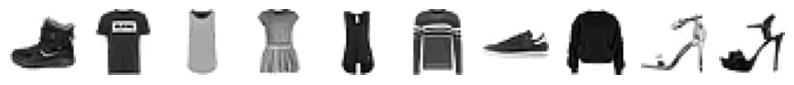

In [7]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r 현재색 반전
    axs[i].axis('off')                          # 그래프 눈금 없애기
plt.show()

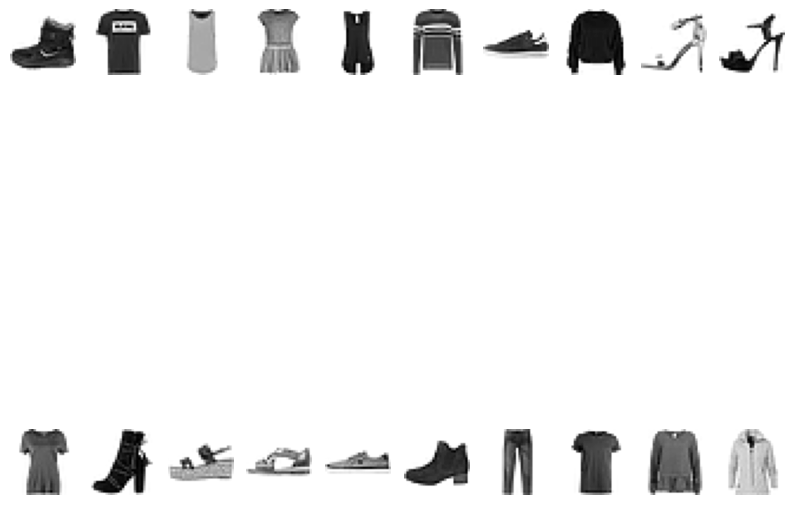

In [8]:
# 두 줄을 출력
fig,axs = plt.subplots(2,10,figsize=(10,10))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')  # gray_r 현재색 반전
        axs[i,j].axis('off')                                # 그래프 눈금 없애기
plt.show()

In [9]:
df_target = pd.DataFrame(train_target)
df_target.value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [10]:
train_target[0]

9

In [11]:
import numpy as np
np.unique(train_target, return_counts=True)  
# train_target 데이터의 유일한 값 추출, return_counts :  각각의 유일값의 개수 리턴

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [23]:
# 28*28개의 데이터가 1개로 합쳐져야 함
# -> 안에 있는 데이터를 0-1의 값으로 변경
train_scaled =  train_input/255
test_scaled = test_input/255

train_scaled = train_scaled.reshape(-1,28*28)  # 28*28 = 784개 1개 묶음으로 변경
test_scaled =  test_scaled.reshape(-1,28*28)

In [24]:
train_scaled[0].shape

(784,)

In [25]:
train_target.shape

(60000,)

In [26]:
# test_input -> 784개의 그룹으로 묶어서
# 경사하강법을 사용하여 패션 아이템을 분류

# 경사하강법
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=5, random_state=42)
scores = cross_validate(sc,train_scaled,train_target,n_jobs=-1) #n_jobs :모든 core
print(np.mean(scores['test_score']))

0.8192833333333333


In [27]:
train_score = []
test_score = []

classes = np.unique(train_target)

In [28]:
for _ in range(50):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

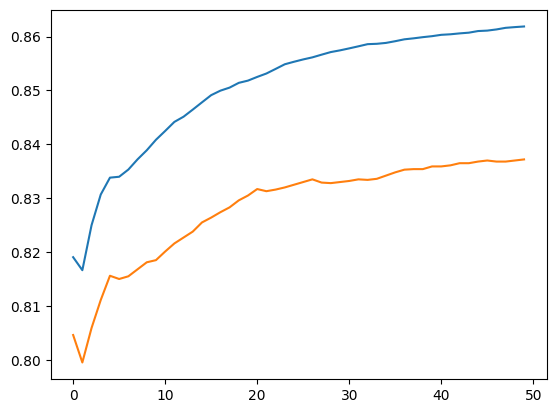

In [29]:
plt.plot(train_score)
plt.plot(test_score)

In [38]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7632274725568974
0.7554404672112257
